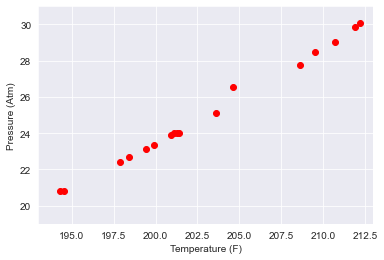

In [37]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


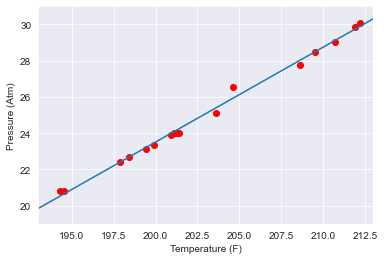

In [38]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()


In [39]:
import math
import numpy as np
with open('fuel.txt') as f:
    lines = f.readlines()

    x_data = []
    y_data = []
    lines.pop(0)

    for line in lines:
        splitted = line.replace('\n', '').split(',')
        splitted.pop(0)
        splitted = list(map(float, splitted))
        fuel = 1000 * splitted[1] / splitted[5]
        dlic = 1000 * splitted[0] / splitted[5]
        logMiles = math.log2(splitted[3])
        y_data.append([fuel])
        x_data.append([splitted[-1], dlic, splitted[2], logMiles])

    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

In [40]:
def qr_householder(A):
#""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        #compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
# """

# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """

# add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [41]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.1928445773093
                 Tax: -4.227983208329615
                Dlic: 0.4718712134419819
              Income: -0.006135330970417619
            LogMiles: 18.545274506048017


SCIKIT-LEARN Method:

In [42]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)
regr.coef_

array([[-81.06372713,   0.5228924 ]])

# EXCERCISE

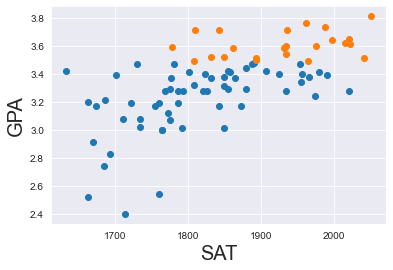

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("SAT_GPA.csv")
data.describe()

y = data['GPA']
x = data['SAT']

y_training = y[:60]
x_training = x[:60]

y_validation = y[60:]
x_validation = x[60:]

plt.scatter(x_training, y_training)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.scatter(x_validation, y_validation)
plt.show()


In [44]:
import statsmodels.api as sm
import seaborn as sns

x1 = sm.add_constant(x_training)
model = sm.OLS(y_training, x1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     20.62
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.88e-05
Time:                        16:53:19   Log-Likelihood:                 10.515
No. Observations:                  60   AIC:                            -17.03
Df Residuals:                      58   BIC:                            -12.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8895      0.514      1.731      0.089      -0.139       1.918
SAT            0.0013      0.000      4.541      0.000       0.001       0.002
==============================================================================
Omnibus:                       17.939   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.193
Skew:                          -1.107   Prob(JB):                     3.38e-06
Kurtosis:                       5.276   Cond. No.                     3.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, the coeff are 0.0013 for w1 and 0.8895 for w0.

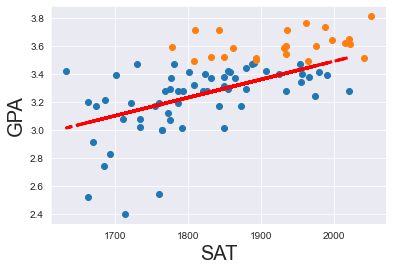

In [48]:
#our equation:
plt.scatter(x_training, y_training)
y_new = 0.8895 + 0.0013 * x_training
plt.plot(x_training, y_new, 'r--', lw=3, label = 'regression line')
plt.scatter(x_validation, y_validation)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Regression with SKLearn

[[0.0012857]]
[0.88948508]
Tong binh phuong sai so:  1.6786863438378654


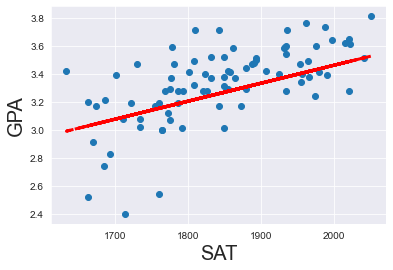

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_training = np.array(x_training).reshape(-1, 1)
y_training = np.array(y_training).reshape(-1, 1)
results = model.fit(x_training, y_training)

y_validation = np.array(y_validation).reshape(-1, 1)
x_validation = np.array(x_validation).reshape(-1, 1)

print(results.coef_)

print(results.intercept_)

y_pred = results.predict(x_validation)

mean_squared_err = ((y_pred - y_validation)**2).sum()
print('Tong binh phuong sai so: ', mean_squared_err)


plt.scatter(x,y)                     ## Plotting the points
y_new = 0.0012857*x + 0.88948505            ## Defining the equation and
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
## but y_new is the lines predicted by the equation
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()                           ## Showing the plot, this line will remove, unnecessary text at the top of the graph

# Bai 2:
Trong y sinh học, bề dày lớp nội trung mạc (NTM) phản ánh một số bệnh lý
của cơ thể. Thực tế hiện tượng dày lớp NTM động mạch cảnh do nhiều yếu tố như di truyền, chủng
tộc, mắc bệnh tim mạch, tuổi, giới, BMI, tăng huyết áp, đái tháo đường.... cùng tác động. Trong ví
dụ này ta không đề cập các yếu tố di truyền, chủng tộc, giới, mắc bệnh tim mạch... mà chỉ lưu ý đến
các biến số như: tuổi, cholesterol, glucose, huyết áp tâm thu và BMI tác động lên độ dày NTM.
Hãy dùng dữ liệu cho trong tệp vidu4_lin_reg.txt (tệp văn bản) để xây dựng mô hình hồi quy tuyến
tính cho thấy sự phụ thuộc của bề dày lớp NTM theo các biến số khác. Tham khảo phần đọc dữ liệu
từ tệp văn bản đã có trong ví dụ trước. Các trường dữ liệu gồm:
ID Mã bệnh nhân
TUOI Tuổi

BIM chỉ số khối lượng cơ thể (Body Mass Index)
HA huyến áp tâm thu
GLUCOSE đường huyết
CHOLESTEROL độ Cholesterol trong máu
BEDAYNTM độ dày NTM
Mô hình cần xây dựng có dạng:
Bề dày NTM= 0 + 1(tuổi) + 2(cholesterol) + 3(glucose) + 4(huyết áp TT) + 5(BMI)
a) Xác định các hệ số với 100 dữ liệu trên
b) Chia dữ liệu thành: 80 dòng đầu dùng cho training; 20 dòng sau dùng cho testing. Tính lại các hệ số
với bộ dữ liệu này, sau đó chạy thử trên bộ dữ liệu test và tính các đại lượng kỳ vọng, phương sai của
sai số.

## a)

In [2]:
import math
import numpy as np
with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()

    x_data = []
    y_data = []
    lines.pop(0)

    for line in lines:
        splitted = line.split(' ')
        splitted = list(map(float, splitted))
        y_data.append([splitted[-1]])
        x_data.append([splitted[1], splitted[5], splitted[4], splitted[3], splitted[2]])

    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
results = model.fit(x_data, y_data)

In [4]:
results.coef_

array([[ 0.00994694,  0.03847025,  0.0076701 ,  0.00218137, -0.00020655]])

In [5]:
results.intercept_

array([-0.10802908])

## b)


In [7]:
x_training = x_data[:80]
y_training = y_data[:80]

In [11]:
x_testing = x_data[80:]
y_testing = y_data[80:]

In [12]:
training_results = model.fit(x_training, y_training)

In [13]:
training_results.coef_

array([[ 0.0089892 ,  0.00708535,  0.00808634,  0.00260218, -0.00047742]])

In [14]:
training_results.intercept_

array([0.04306436])

In [15]:
y_pred = training_results.predict(x_testing)
